In [23]:
# Tokenization using Hugging Face's Transformers
from transformers import AutoTokenizer
import warnings

warnings.filterwarnings("ignore")

tokenizer = AutoTokenizer.from_pretrained("gpt2")
tokens = tokenizer.tokenize("A young girl named Alice sits bored by a riverbank...")

In [12]:
# Embedding and Processing with a Transformer Model
from transformers import AutoModel

model = AutoModel.from_pretrained("gpt2")
inputs = tokenizer("A young girl named Alice sits bored by a riverbank...", return_tensors="pt")
outputs = model(**inputs)
last_hidden_states = outputs.last_hidden_state

In [26]:
import numpy as np

np_array = np.array(last_hidden_states.detach())
print(np_array.shape)

(1, 12, 768)


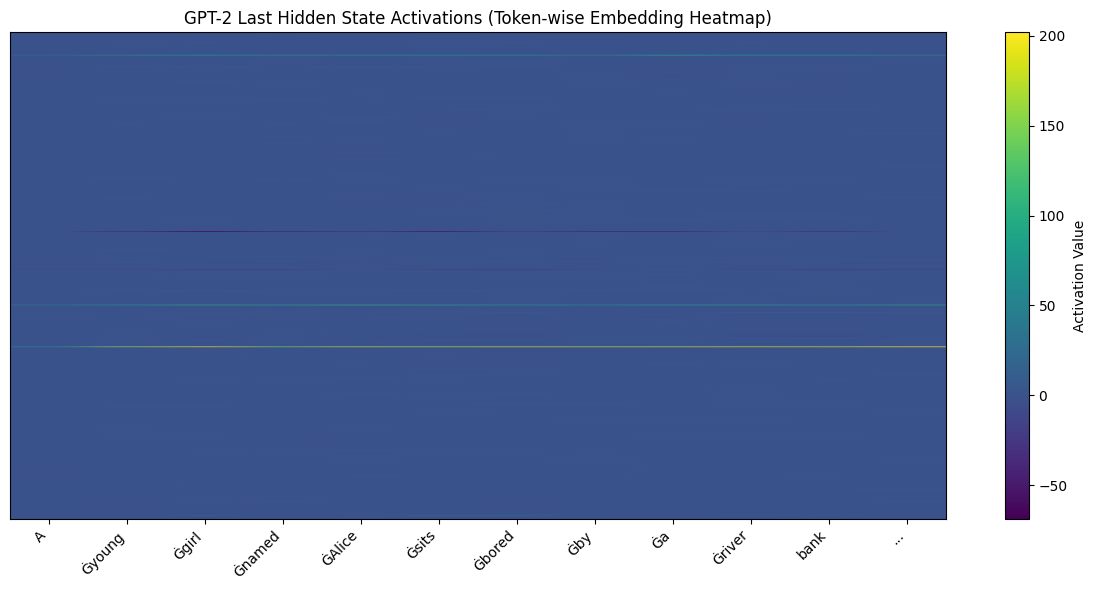

In [28]:
# Visualization of Embeddings (Simplified Example)
import matplotlib.pyplot as plt

# Plot setup
plt.figure(figsize=(12, 6))  # Wider figure
plt.imshow(last_hidden_states.detach().numpy().T, aspect='auto', cmap='viridis')
plt.colorbar(label='Activation Value')

# Token labels on x-axis
plt.xticks(range(len(tokens)), tokens, rotation=45, ha='right', fontsize=10)
plt.yticks([])  # Optional: remove y-axis labels since they represent dimensions (0-767)
plt.title("GPT-2 Last Hidden State Activations (Token-wise Embedding Heatmap)")
plt.tight_layout()
plt.show()